Nama : Satria Baladewa Harahap

# Library

In [ ]:
!pip install opendatasets
import os
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Kaggle Dataset:
https://www.kaggle.com/datasets/shrutipandit707/flowerrecognitiondataset

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/shrutipandit707/flowerrecognitiondataset")
!rm -r flowerrecognitiondataset/flowers/dandelion/
!rm -r flowerrecognitiondataset/flowers/tulip/

BASE_DIR = 'flowerrecognitiondataset/flowers'

Skipping, found downloaded files in "./flowerrecognitiondataset" (use force=True to force download)
rm: cannot remove 'flowerrecognitiondataset/flowers/dandelion/': No such file or directory
rm: cannot remove 'flowerrecognitiondataset/flowers/tulip/': No such file or directory


In [ ]:
print("Jumlah Daisy: "+str(len(os.listdir('flowerrecognitiondataset/flowers/daisy'))))
print("Jumlah Rose: "+str(len(os.listdir('flowerrecognitiondataset/flowers/rose'))))
print("Jumlah Sunflower: "+str(len(os.listdir('flowerrecognitiondataset/flowers/sunflower'))))

Jumlah Daisy: 764
Jumlah Rose: 784
Jumlah Sunflower: 733


# Augmentasi Gambar

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(100,100),
    batch_size=12,
    class_mode='categorical',
    subset='training'
)

valid_generator = valid_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(100,100),
    batch_size=12,
    class_mode='categorical',
    subset='validation'
)

Found 1827 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


# Asristektur CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', strides=(1,1), padding='same', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 128)      0

# CUSTOM CALLBACK

In [ ]:
class stopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('Accuracy')>=0.87 and logs.get('val_Accuracy')>=0.87):
      print("Stop Training, Accuracy has already reach 85%")
      self.model.stop_training=True

customCallback = stopTraining()

# COMPILING AND FITTING MODEL

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['Accuracy'])

In [ ]:
records = model.fit(train_generator,
                    steps_per_epoch=100, 
                    epochs=100,
                    validation_data=valid_generator, 
                    validation_steps=10, 
                    verbose=2,
                    callbacks=[[customCallback]])

Epoch 1/100
100/100 - 6s - loss: 0.9374 - Accuracy: 0.5374 - val_loss: 0.7537 - val_Accuracy: 0.6583 - 6s/epoch - 63ms/step
Epoch 2/100
100/100 - 5s - loss: 0.6629 - Accuracy: 0.7258 - val_loss: 0.7357 - val_Accuracy: 0.6750 - 5s/epoch - 55ms/step
Epoch 3/100
100/100 - 5s - loss: 0.6188 - Accuracy: 0.7490 - val_loss: 0.5990 - val_Accuracy: 0.7833 - 5s/epoch - 53ms/step
Epoch 4/100
100/100 - 6s - loss: 0.5683 - Accuracy: 0.7758 - val_loss: 0.5291 - val_Accuracy: 0.7833 - 6s/epoch - 57ms/step
Epoch 5/100
100/100 - 5s - loss: 0.5285 - Accuracy: 0.7985 - val_loss: 0.6022 - val_Accuracy: 0.7500 - 5s/epoch - 53ms/step
Epoch 6/100
100/100 - 5s - loss: 0.5386 - Accuracy: 0.7859 - val_loss: 0.5518 - val_Accuracy: 0.7583 - 5s/epoch - 54ms/step
Epoch 7/100
100/100 - 6s - loss: 0.4933 - Accuracy: 0.8086 - val_loss: 0.5370 - val_Accuracy: 0.7750 - 6s/epoch - 57ms/step
Epoch 8/100
100/100 - 6s - loss: 0.4847 - Accuracy: 0.8083 - val_loss: 0.4841 - val_Accuracy: 0.8333 - 6s/epoch - 64ms/step
Epoch 9/

# PLOT ACCURACY and LOSS

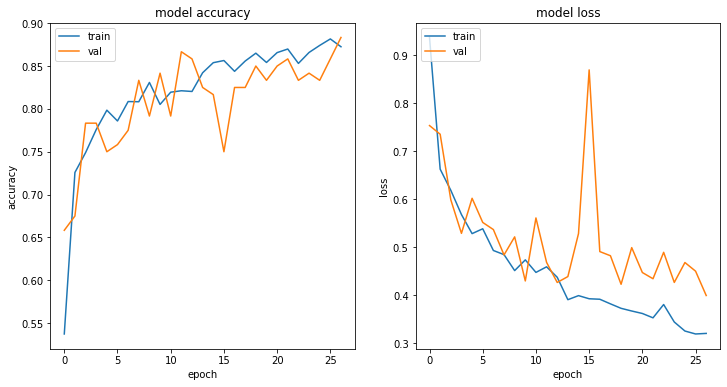

In [ ]:
f = plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(records.history['Accuracy'])
plt.plot(records.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(records.history['loss'])
plt.plot(records.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

# Saving Model to TF_LITE FORMAT

In [ ]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()
     
with tf.io.gfile.GFile('model_image_classification.tflite', 'wb') as f:
  f.write(tflite_model)